In [1]:
from ml_utils import *
import seaborn as sns

In [2]:
train_features = pd.read_csv('dengue_features_train.csv')
train_labels = pd.read_csv('dengue_labels_train.csv')
test_features = pd.read_csv('dengue_features_test.csv')

In [3]:
pks = ['city', 'year', 'weekofyear']

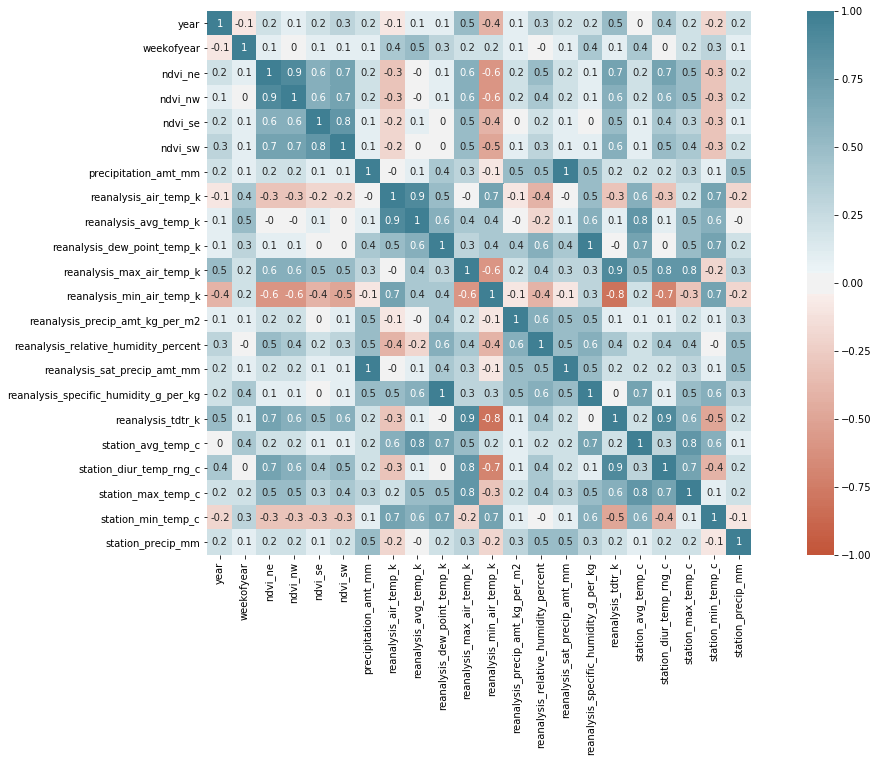

In [4]:
corr = train_features.corr().applymap(lambda x: round(x, 1))
plt.figure(figsize = (20,10))
ax = sns.heatmap(
    corr,
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot=True
)

In [5]:
sj = train_features[train_features.city == 'sj'].reset_index(drop = True).copy()
iq = train_features[train_features.city == 'iq'].reset_index(drop = True).copy()

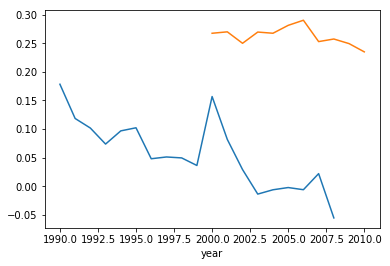

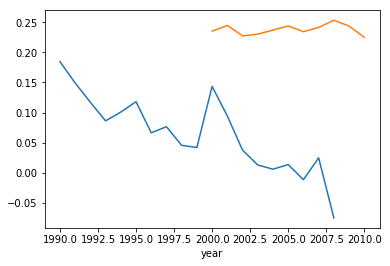

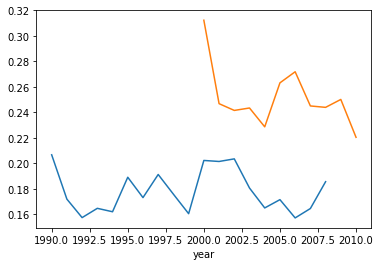

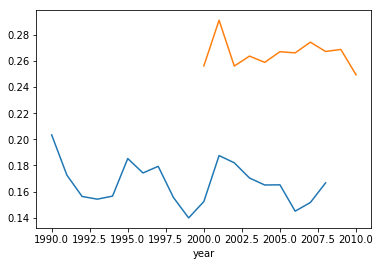

In [6]:
sj.groupby('year').mean().ndvi_ne.plot()
iq.groupby('year').mean().ndvi_ne.plot()
plt.show()

sj.groupby('year').mean().ndvi_nw.plot()
iq.groupby('year').mean().ndvi_nw.plot()
plt.show()

sj.groupby('year').mean().ndvi_se.plot()
iq.groupby('year').mean().ndvi_se.plot()
plt.show()

sj.groupby('year').mean().ndvi_sw.plot()
iq.groupby('year').mean().ndvi_sw.plot()
plt.show()

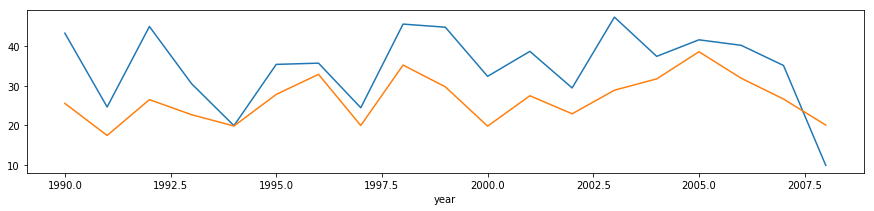

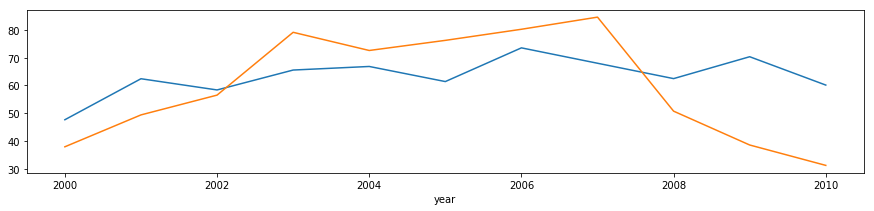

In [7]:
sj.groupby('year').mean().reanalysis_sat_precip_amt_mm.plot(figsize=(15,3))
sj.groupby('year').mean().station_precip_mm.plot(figsize=(15,3))
plt.show()

iq.groupby('year').mean().reanalysis_sat_precip_amt_mm.plot(figsize=(15,3))
iq.groupby('year').mean().station_precip_mm.plot(figsize=(15,3))

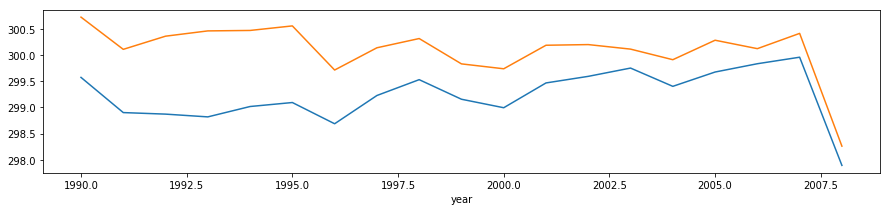

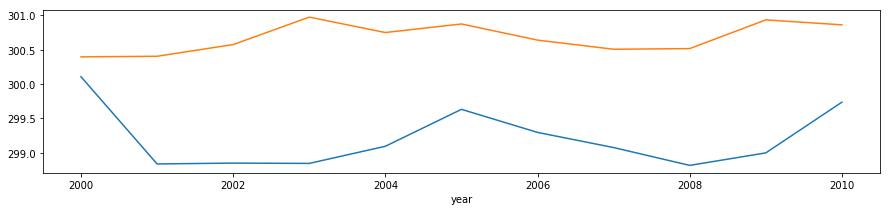

In [8]:
#sj.groupby('year').mean().reanalysis_air_temp_k.plot(figsize=(15,3))
sj.groupby('year').mean().reanalysis_avg_temp_k.plot(figsize=(15,3))
a = sj.groupby('year').mean().station_avg_temp_c + 273.15
a.plot(figsize=(15,3))
plt.show()


#iq.groupby('year').mean().reanalysis_air_temp_k.plot(figsize=(15,3))
iq.groupby('year').mean().reanalysis_avg_temp_k.plot(figsize=(15,3))
a = iq.groupby('year').mean().station_avg_temp_c + 273.15 # Convert celsius to kelvin
a.plot(figsize=(15,3))

In [6]:
train_model(train_features, train_labels)

In [4]:
result = predict_model(test_features, pks)

In [5]:
result.to_csv('output_day3.csv', index=False)

Result after removing some features:
#### Woo! I scored 26.8918 on 'DengAI: Predicting Disease Spread'!

In [2]:
train_features = pd.read_csv('dengue_features_train.csv')
train_labels = pd.read_csv('dengue_labels_train.csv')
test_features = pd.read_csv('dengue_features_test.csv')
pks = ['city', 'year', 'weekofyear']

In [3]:
def window_mean(data, feature, size):
    data[feature + '_window_' + str(size)] = data[feature].rolling(size).mean()
    return data

In [4]:
train_features = window_mean(train_features, 'reanalysis_sat_precip_amt_mm', 2)
train_features = window_mean(train_features, 'reanalysis_sat_precip_amt_mm', 4)
train_features = window_mean(train_features, 'reanalysis_avg_temp_k', 2)
train_features = window_mean(train_features, 'reanalysis_avg_temp_k', 4)
train_features = window_mean(train_features, 'reanalysis_specific_humidity_g_per_kg', 2)
train_features = window_mean(train_features, 'reanalysis_specific_humidity_g_per_kg', 4)

test_features = window_mean(test_features, 'reanalysis_sat_precip_amt_mm', 2)
test_features = window_mean(test_features, 'reanalysis_sat_precip_amt_mm', 4)
test_features = window_mean(test_features, 'reanalysis_avg_temp_k', 2)
test_features = window_mean(test_features, 'reanalysis_avg_temp_k', 4)
test_features = window_mean(test_features, 'reanalysis_specific_humidity_g_per_kg', 2)
test_features = window_mean(test_features, 'reanalysis_specific_humidity_g_per_kg', 4)

In [5]:
train_model(train_features, train_labels)

0:	loss: 31.4953071	best: 31.4953071 (0)	total: 327ms	remaining: 17.3s
10:	loss: 30.8341744	best: 29.7068660 (9)	total: 1.79s	remaining: 7s
20:	loss: 31.2105771	best: 28.5066498 (17)	total: 6.16s	remaining: 9.67s
30:	loss: 28.1616180	best: 28.1616180 (30)	total: 11s	remaining: 8.13s
40:	loss: 31.4720088	best: 28.1616180 (30)	total: 21.5s	remaining: 6.82s
50:	loss: 28.6877541	best: 28.1616180 (30)	total: 43.5s	remaining: 2.56s
53:	loss: 28.2625380	best: 28.1224240 (51)	total: 56.3s	remaining: 0us
Estimating final quality...
depth                7.0
l2_leaf_reg          5.0
iterations         300.0
learning_rate        0.1
test-RMSE-mean       NaN
test-RMSE-std        NaN
train-RMSE-mean      NaN
train-RMSE-std       NaN
Name: params, dtype: float64
0:	learn: 43.0083119	test: 37.6845263	best: 37.6845263 (0)	total: 23.6ms	remaining: 7.05s
100:	learn: 18.4302312	test: 24.7342971	best: 24.5104898 (74)	total: 1.44s	remaining: 2.83s
200:	learn: 11.5274160	test: 24.7154484	best: 24.5104898 (74

In [ ]:
#result = predict_model(test_features, pks)

In [6]:
features = {
    "sj": [
        'ndvi_ne',
        'ndvi_nw',
        'ndvi_se',
        'ndvi_sw',
        'precipitation_amt_mm',
        'reanalysis_air_temp_k',
        'reanalysis_avg_temp_k',
        'reanalysis_dew_point_temp_k',
        'reanalysis_max_air_temp_k', 
        'reanalysis_min_air_temp_k',
        'reanalysis_precip_amt_kg_per_m2',
        'reanalysis_relative_humidity_percent',
        'reanalysis_sat_precip_amt_mm',
        'reanalysis_specific_humidity_g_per_kg',
        'reanalysis_tdtr_k',
        'station_avg_temp_c',
        'station_diur_temp_rng_c', 
        'station_max_temp_c',
        'station_min_temp_c',
        'station_precip_mm',
       
       'reanalysis_sat_precip_amt_mm_window_2',
       'reanalysis_sat_precip_amt_mm_window_4',
       'reanalysis_avg_temp_k_window_2', 
        'reanalysis_avg_temp_k_window_4',
       'reanalysis_specific_humidity_g_per_kg_window_2',
       'reanalysis_specific_humidity_g_per_kg_window_4'
    ],
    "iq": [
        'ndvi_ne',
        'ndvi_nw',
        'ndvi_se',
        'ndvi_sw',
        'precipitation_amt_mm',
        'reanalysis_air_temp_k',
        'reanalysis_avg_temp_k',
        'reanalysis_dew_point_temp_k',
        'reanalysis_max_air_temp_k', 
        'reanalysis_min_air_temp_k',
        'reanalysis_precip_amt_kg_per_m2',
        'reanalysis_relative_humidity_percent',
        'reanalysis_sat_precip_amt_mm',
        'reanalysis_specific_humidity_g_per_kg',
        'reanalysis_tdtr_k',
        'station_avg_temp_c',
        'station_diur_temp_rng_c', 
        'station_max_temp_c',
        'station_min_temp_c',
        'station_precip_mm',
        
        'reanalysis_sat_precip_amt_mm_window_2',
       'reanalysis_sat_precip_amt_mm_window_4',
       'reanalysis_avg_temp_k_window_2', 
        'reanalysis_avg_temp_k_window_4',
       'reanalysis_specific_humidity_g_per_kg_window_2',
       'reanalysis_specific_humidity_g_per_kg_window_4'
    ]
}

params = {
    "sj":{
        'iterations': [50, 100, 300],
        'learning_rate': [0.05, 0.1],
        'depth': [3, 5, 7],
        'l2_leaf_reg': [1, 5, 9]
    },
    "iq":{
        'iterations': [50, 100, 300],
        'learning_rate': [0.05, 0.1],
        'depth': [3, 5],
        'l2_leaf_reg': [1, 5, 9]
    }
}

pks = ['city', 'year', 'weekofyear']

In [7]:
train_city('sj', train_features, train_labels, features, params)

sj
0:	loss: 30.1565728	best: 30.1565728 (0)	total: 207ms	remaining: 11s
10:	loss: 29.9692544	best: 29.6524288 (8)	total: 1.6s	remaining: 6.25s
20:	loss: 30.5879137	best: 29.4706319 (15)	total: 5.81s	remaining: 9.13s
30:	loss: 30.3173948	best: 29.4706319 (15)	total: 10.6s	remaining: 7.86s
40:	loss: 33.7103758	best: 29.4706319 (15)	total: 21s	remaining: 6.65s
50:	loss: 32.5067966	best: 29.4706319 (15)	total: 40.9s	remaining: 2.4s
53:	loss: 32.0405831	best: 29.4706319 (15)	total: 52.6s	remaining: 0us
Estimating final quality...
depth                3.0
l2_leaf_reg          5.0
iterations         300.0
learning_rate        0.1
test-RMSE-mean       NaN
test-RMSE-std        NaN
train-RMSE-mean      NaN
train-RMSE-std       NaN
Name: params, dtype: float64
0:	learn: 48.6264870	test: 53.9949881	best: 53.9949881 (0)	total: 3.95ms	remaining: 1.18s
100:	learn: 28.5095939	test: 35.2085893	best: 35.1506957 (94)	total: 184ms	remaining: 363ms
200:	learn: 23.6530770	test: 33.7990736	best: 33.7651408 (

In [8]:
train_city('iq', train_features, train_labels, features, params)

iq
0:	loss: 7.4077151	best: 7.4077151 (0)	total: 172ms	remaining: 6.03s
10:	loss: 7.3915182	best: 7.3915182 (4)	total: 1.52s	remaining: 3.46s
20:	loss: 7.4256880	best: 7.3915182 (4)	total: 5.54s	remaining: 3.96s
30:	loss: 7.5134489	best: 7.3202697 (28)	total: 10.2s	remaining: 1.65s
35:	loss: 7.3466577	best: 7.3202697 (28)	total: 16.7s	remaining: 0us
Estimating final quality...
depth                5.00
l2_leaf_reg          9.00
iterations         100.00
learning_rate        0.05
test-RMSE-mean        NaN
test-RMSE-std         NaN
train-RMSE-mean       NaN
train-RMSE-std        NaN
Name: params, dtype: float64
0:	learn: 10.5411516	test: 11.3852210	best: 11.3852210 (0)	total: 7.72ms	remaining: 765ms
99:	learn: 8.2271654	test: 10.8370482	best: 10.8370482 (99)	total: 436ms	remaining: 0us

bestTest = 10.83704825
bestIteration = 99

         Train       Test
RMSE  8.227165  10.837048
                                        Feature Id  Importances
0                               station_max_t

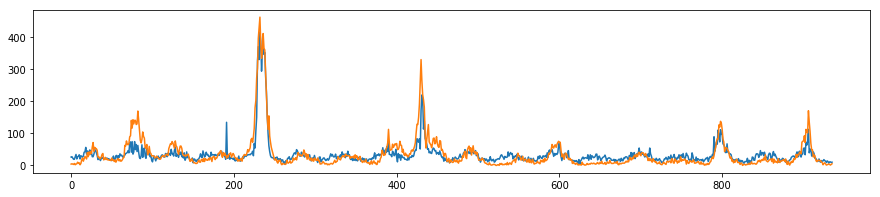

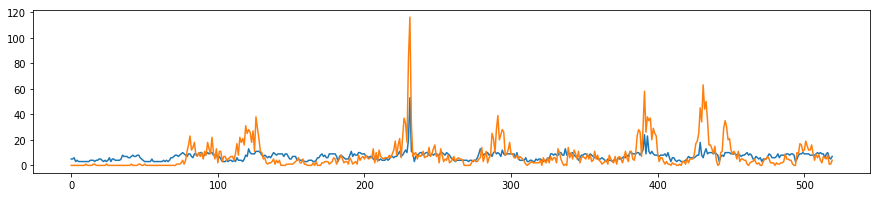

In [16]:
cities = train_features.city.unique()
train_result = pd.DataFrame()
for c in cities:
    train_result = predict_city(c, train_features, features, pks)
    train_result.total_cases.plot(figsize=(15,3))
    train_labels[train_labels.city == c].reset_index(drop = True).total_cases.plot(figsize=(15,3))
    plt.show()

In [17]:
cities = train_features.city.unique()
result = pd.DataFrame()
for c in cities:
    result = result.append(predict_city(c, test_features, features, pks))

In [18]:
result.to_csv('output_day3_new_features.csv', index=False)

## New model filtering some features

In [1]:
from ml_utils import *

In [2]:
train_features = pd.read_csv('dengue_features_train.csv')
train_labels = pd.read_csv('dengue_labels_train.csv')
test_features = pd.read_csv('dengue_features_test.csv')
pks = ['city', 'year', 'weekofyear']

In [3]:
def window_mean(data, feature, size):
    data[feature + '_window_' + str(size)] = data[feature].rolling(size).mean()
    return data

def last_mean(data, feature, size):
    data[feature + '_window_' + str(size)] = data[feature].rolling(size).mean()
    return data

In [4]:
train_features = window_mean(train_features, 'reanalysis_specific_humidity_g_per_kg', 2)
train_features = window_mean(train_features, 'reanalysis_specific_humidity_g_per_kg', 4)
train_features = window_mean(train_features, 'reanalysis_dew_point_temp_k', 2)
train_features = window_mean(train_features, 'reanalysis_dew_point_temp_k', 4)
train_features = window_mean(train_features, 'station_min_temp_c', 2)
train_features = window_mean(train_features, 'station_min_temp_c', 4)
train_features = window_mean(train_features, 'station_avg_temp_c', 2)
train_features = window_mean(train_features, 'station_avg_temp_c', 4)

test_features = window_mean(test_features, 'reanalysis_specific_humidity_g_per_kg', 2)
test_features = window_mean(test_features, 'reanalysis_specific_humidity_g_per_kg', 4)
test_features = window_mean(test_features, 'reanalysis_dew_point_temp_k', 2)
test_features = window_mean(test_features, 'reanalysis_dew_point_temp_k', 4)
test_features = window_mean(test_features, 'station_min_temp_c', 2)
test_features = window_mean(test_features, 'station_min_temp_c', 4)
test_features = window_mean(test_features, 'station_avg_temp_c', 2)
test_features = window_mean(test_features, 'station_avg_temp_c', 4)

In [5]:
features = {
    "sj": [
        'reanalysis_specific_humidity_g_per_kg',
        'reanalysis_dew_point_temp_k',
        'station_min_temp_c',
        'station_avg_temp_c',
        'reanalysis_specific_humidity_g_per_kg_window_2',
        'reanalysis_dew_point_temp_k_window_2',
        'station_min_temp_c_window_2',
        'station_avg_temp_c_window_2',
        'reanalysis_specific_humidity_g_per_kg_window_4',
        'reanalysis_dew_point_temp_k_window_4',
        'station_min_temp_c_window_4',
        'station_avg_temp_c_window_4'
    ],
    "iq": [
        'reanalysis_specific_humidity_g_per_kg',
        'reanalysis_dew_point_temp_k',
        'station_min_temp_c',
        'station_avg_temp_c',
        'reanalysis_specific_humidity_g_per_kg_window_2',
        'reanalysis_dew_point_temp_k_window_2',
        'station_min_temp_c_window_2',
        'station_avg_temp_c_window_2',
        'reanalysis_specific_humidity_g_per_kg_window_4',
        'reanalysis_dew_point_temp_k_window_4',
        'station_min_temp_c_window_4',
        'station_avg_temp_c_window_4'
    ]
}

grid_params = {
    "sj":{
        'iterations': [50, 100, 300],
        'learning_rate': [0.05, 0.1],
        'depth': [3, 5, 7],
        'l2_leaf_reg': [1, 5, 9]
    },
    "iq":{
        'iterations': [50, 100, 300],
        'learning_rate': [0.05, 0.1],
        'depth': [3, 5],
        'l2_leaf_reg': [1, 5, 9]
    }
}

pks = ['city', 'year', 'weekofyear']

In [6]:
train_city('sj', train_features, train_labels, features, grid_params, grid_search = False)
train_city('iq', train_features, train_labels, features, grid_params, grid_search = False)

sj
0:	learn: 53.3423597	test: 40.0741439	best: 40.0741439 (0)	total: 66.9ms	remaining: 1m 6s
100:	learn: 39.0255897	test: 40.1599216	best: 39.0073978 (14)	total: 352ms	remaining: 3.13s
200:	learn: 32.7915809	test: 40.7204917	best: 39.0073978 (14)	total: 610ms	remaining: 2.42s
300:	learn: 28.0710815	test: 41.4740308	best: 39.0073978 (14)	total: 862ms	remaining: 2s
400:	learn: 23.9730210	test: 42.4857337	best: 39.0073978 (14)	total: 1.1s	remaining: 1.65s
500:	learn: 20.4331930	test: 42.6500440	best: 39.0073978 (14)	total: 1.35s	remaining: 1.35s
600:	learn: 18.0111273	test: 42.8138107	best: 39.0073978 (14)	total: 1.59s	remaining: 1.06s
700:	learn: 16.0865020	test: 43.0872445	best: 39.0073978 (14)	total: 1.84s	remaining: 787ms
800:	learn: 14.4212002	test: 43.1821581	best: 39.0073978 (14)	total: 2.1s	remaining: 523ms
900:	learn: 12.9769179	test: 43.1043318	best: 39.0073978 (14)	total: 2.38s	remaining: 261ms
999:	learn: 11.6525898	test: 43.4115856	best: 39.0073978 (14)	total: 2.65s	remaining

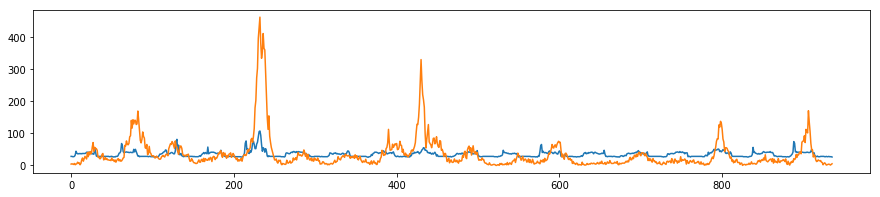

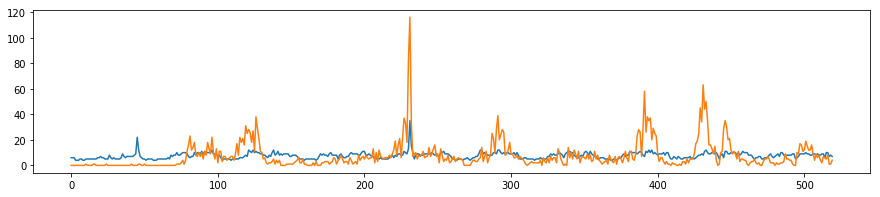

In [7]:
cities = train_features.city.unique()
train_result = pd.DataFrame()
for c in cities:
    train_result = predict_city(c, train_features, features, pks)
    train_result.total_cases.plot(figsize=(15,3))
    train_labels[train_labels.city == c].reset_index(drop = True).total_cases.plot(figsize=(15,3))
    plt.show()

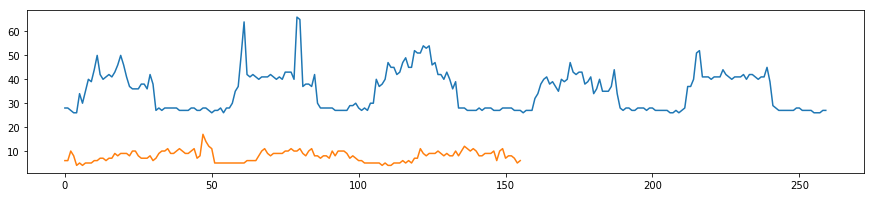

In [8]:
cities = train_features.city.unique()
result = pd.DataFrame()
for c in cities:
    p = predict_city(c, test_features, features, pks)
    result = result.append(p)
    p.total_cases.plot(figsize=(15,3))

In [9]:
result.to_csv('output_day3_new_features2.csv', index=False)